 # FashionMNIST

 ## Задание 7.2

<img src="https://emiliendupont.github.io/imgs/mnist-chicken/mnist-and-fashion-examples.png">

На практике построим нейронную сеть для классификации картиной. В качестве входных данных используются картинки одежды (в градациях серого, то есть цветовых каналов не 3, а 1). По входной картинке нужно предсказать тип одежды.

In [ ]:

%tensorflow_version 1.x
import keras
from keras.models import Sequential
from keras import layers
from keras.layers import Dense, Activation, Flatten, Conv2D,MaxPooling2D, Dropout, BatchNormalization
import keras.datasets
from keras.datasets import fashion_mnist

TensorFlow 1.x selected.


Using TensorFlow backend.


Скачаем обучающую и контрольную выборки.

Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw


Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw
Processing...
Done!


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:480: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [ ]:
classes = trainset.classes

Каждая картинка имеет класс от 0 до 9, расшифровка меток класса:  

|class_id|class_name|
|----|----|
|0| T-shirt/top|
|1| Trouser|
|2| Pullover|
|3| Dress|
|4| Coat|
|5| Sandal|
|6| Shirt|
|7| Sneaker|
|8| Bag|
|9| Ankle boot| 

<h2 style="text-align: center;"><b>Задание</b></h2>

Посмотрите на датасет.
* Сколько картинок в train? В test?
* Равномерно ли распределено количество объектов разных классов в train датасете (это можно понять, поработав с полем `train_data` у переменной `trainset`)? в test?
* Выведите несколько картинок с помощью `pyplot`

Используя материалы семинаров по многослойным  и свёрточным сетям, напишите:
1.  Многослойную нейронную сеть MLP (Multi-Layer Perceptron) классифицирующую этот датасет
2. Свёрточную сеть, классифицирующую этот датасет
3. Сравните их качество (по графикам лосса и по Accuracy Score)

Если качество, которое получается у  нейросети, выше 95%, то Вы решили задачу с точностью, которую можно использовать в жизни.

In [ ]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

60000
10000
(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))
(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000]))


<Figure size 432x288 with 0 Axes>

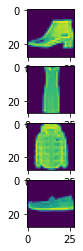

In [ ]:
print(X_train.shape[0])
print(X_test.shape[0])
print(np.unique(y_train,return_counts= True))
print(np.unique(y_test,return_counts= True))
plt.figure()
f, axarr = plt.subplots(4,1) 
axarr[0].imshow(X_train[np.random.randint(0,X_train.shape[0])])
axarr[1].imshow(X_train[np.random.randint(0,X_train.shape[0])])
axarr[2].imshow(X_train[np.random.randint(0,X_train.shape[0])])
axarr[3].imshow(X_train[np.random.randint(0,X_train.shape[0])])

In [ ]:
X_train, X_test = X_train / 255, X_test / 255 # Нормализация

In [ ]:
input_size = X_train[0].shape
input_size
y_train=keras.utils.to_categorical(y_train,10)
y_test=keras.utils.to_categorical(y_test,10)
y_train.shape

(60000, 10)

In [ ]:
model = Sequential()
model.add(Flatten(input_shape = input_size))
model.add(Dense(128, activation= 'relu'))
model.add(Dropout(0.4))
model.add(Dense(64,activation= 'relu'))
model.add(Dropout(0.4))
model.add(Dense(10,activation= 'softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [ ]:
model.summary()
hist = model.fit(X_train, y_train, batch_size=64, epochs=40)

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_19 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_45 (Dense)             (None, 128)               100480    
_________________________________________________________________
dropout_27 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_46 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_28 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_47 (Dense)             (None, 10)                650       
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_______________________________________________

Text(0.5, 1.0, 'LOSS, ACC vs EPOCHS')

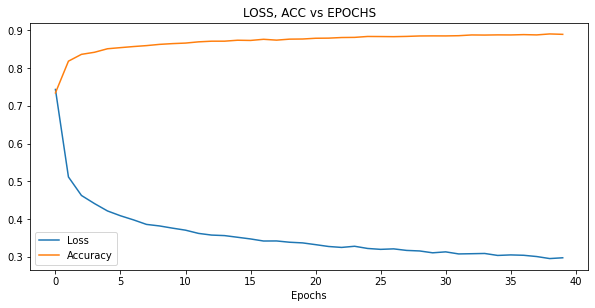

In [ ]:
loss = hist.history['loss']
accuracy = hist.history['accuracy']
epochs = hist.epoch
plt.figure(figsize=(10,10))
plt.subplot(2,1, 1)
plt.plot(epochs, loss, label= 'Loss')
plt.plot(epochs, accuracy, label = 'Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.title('LOSS, ACC vs EPOCHS')

In [ ]:
model.evaluate(X_test, y_test)

10000/10000 [==============================] - 0s 43us/step


[0.32778298358917235, 0.8855000138282776]

In [ ]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
X_train, X_test = X_train.reshape((60000, 28, 28, 1)), X_test.reshape((10000, 28, 28, 1))
X_train, X_test = X_train / 255, X_test / 255 
y_train=keras.utils.to_categorical(y_train,10)
y_test=keras.utils.to_categorical(y_test,10)
model = Sequential([
    Conv2D(24, kernel_size = 3, activation = 'relu', padding = 'same',input_shape = (28,28,)),
    BatchNormalization(),1
    Conv2D(24, kernel_size = 3, activation = 'relu', padding = 'same'),
    BatchNormalization(),
    Conv2D(24, kernel_size = 5, strides = 2, padding='same', activation='relu'),
    BatchNormalization(),
    Dropout(0.4),
    
    Conv2D(50, kernel_size = 3, activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(50, kernel_size = 3, activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(50, kernel_size = 5, strides=2, padding='same', activation='relu'),
    BatchNormalization(),
    Dropout(0.4),

    Conv2D(100, kernel_size = 3, activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(100, kernel_size = 3, activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(100, kernel_size = 5, strides =2, padding='same', activation='relu'),
    BatchNormalization(),
    Dropout(0.4),
    

    Flatten(),
    
    Dense(256, activation = 'relu'),
    BatchNormalization(),
    Dropout(0.4),
    Dense(10, activation = 'softmax'),
])

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
hist = model.fit(X_train, y_train, batch_size=32, epochs=30)
model.summary()


Epoch 1/30
60000/60000 [==============================] - 36s 606us/step - loss: 0.5235 - accuracy: 0.8145
Epoch 2/30
60000/60000 [==============================] - 28s 469us/step - loss: 0.3354 - accuracy: 0.8773
Epoch 3/30
60000/60000 [==============================] - 28s 469us/step - loss: 0.2882 - accuracy: 0.8945
Epoch 4/30
60000/60000 [==============================] - 28s 461us/step - loss: 0.2654 - accuracy: 0.9053
Epoch 5/30
60000/60000 [==============================] - 28s 466us/step - loss: 0.2432 - accuracy: 0.9124
Epoch 6/30
60000/60000 [==============================] - 28s 475us/step - loss: 0.2241 - accuracy: 0.9184
Epoch 7/30
60000/60000 [==============================] - 29s 492us/step - loss: 0.2097 - accuracy: 0.9234
Epoch 8/30
60000/60000 [==============================] - 29s 478us/step - loss: 0.1945 - accuracy: 0.9291
Epoch 9/30
60000/60000 [==============================] - 28s 473us/step - loss: 0.1806 - accuracy: 0.9338
Epoch 10/30
60000/60000 [===========

Text(0.5, 1.0, 'LOSS, ACC vs EPOCHS')

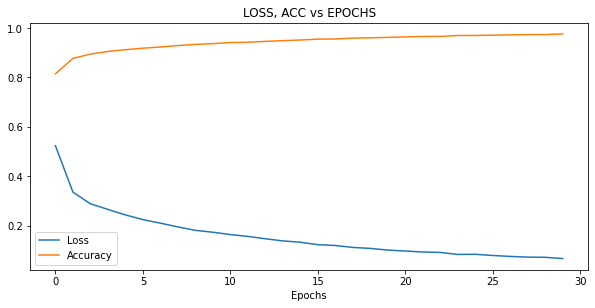

In [ ]:
loss = hist.history['loss']
accuracy = hist.history['accuracy']
epochs = hist.epoch
plt.figure(figsize=(10,10))
plt.subplot(2,1, 1)
plt.plot(epochs, loss, label= 'Loss')
plt.plot(epochs, accuracy, label = 'Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.title('LOSS, ACC vs EPOCHS')

In [ ]:
model.evaluate(X_test, y_test)

10000/10000 [==============================] - 2s 168us/step


[0.27207944136774165, 0.9319999814033508]

In [ ]:
predict = model.predict_classes(X_test)

In [ ]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [ ]:
p = predict
y = y_test
correct = np.nonzero(p==y)[0]
incorrect = np.nonzero(p!=y)[0]

In [ ]:
def plot_images(data_index,cmap="Blues"):
    # Plot the sample images now
    f, ax = plt.subplots(4,4, figsize=(15,15))

    for i, indx in enumerate(data_index[:16]):
        ax[i//4, i%4].imshow(X_test[indx].reshape(28,28), cmap=cmap)
        ax[i//4, i%4].axis('off')
        ax[i//4, i%4].set_title("True:{}  Pred:{}".format(class_names[y_test[indx]],class_names[predict[indx]]))
    plt.show()    

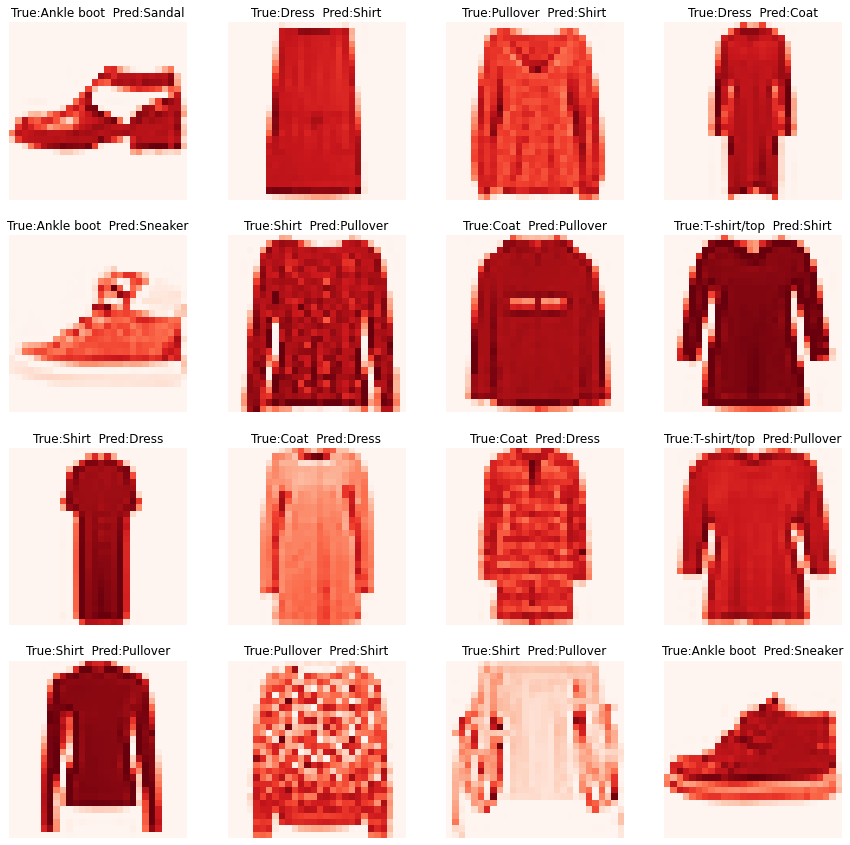

In [ ]:
plot_images(incorrect,cmap="Reds")

In [ ]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
import pandas as pd
import seaborn as sn

In [ ]:
conf = confusion_matrix(y_test,predict)

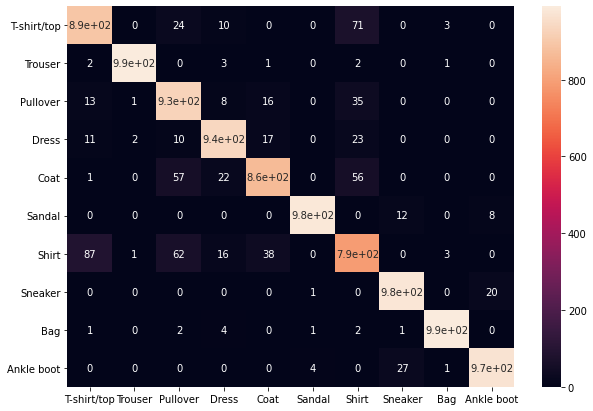

In [ ]:
df_cm = pd.DataFrame(conf, index = [i for i in class_names],
                  columns = [i for i in class_names])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)